# NESNE TESPİTİ İLE YÜZDE GÖZLÜK TESPİT MODELİ

# 1. Ultralytic Kütüphanelerinin İçe Aktarımı

Bu projede yolov8, openCV ile nesne tespiti yapılmıştır

In [15]:
# 1. Google Drive'a Bağlanma
from google.colab import drive
drive.mount('/content/drive')

# 2. Gerekli Kütüphaneleri Yükleme
!pip install ultralytics
!pip install opencv-python matplotlib

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
#proje dosyalarını otomatik oluşturan kod bloğu.
import os

# Projenizin ana dizini
base_path = '/content/drive/MyDrive/yüzde gözlük teşhisi'

directories = [
    'dataset/images/train',
    'dataset/images/val',
    'dataset/images/test',
    'dataset/labels/train',
    'dataset/labels/val',
    'dataset/labels/test'
]

for directory in directories:
    path = os.path.join(base_path, directory)
    os.makedirs(path, exist_ok=True)
    print(f"Klasör oluşturuldu: {path}")

print("\nTüm klasör yapısı hazırlandı.")

Klasör oluşturuldu: /content/drive/MyDrive/yüzde gözlük teşhisi/dataset/images/train
Klasör oluşturuldu: /content/drive/MyDrive/yüzde gözlük teşhisi/dataset/images/val
Klasör oluşturuldu: /content/drive/MyDrive/yüzde gözlük teşhisi/dataset/images/test
Klasör oluşturuldu: /content/drive/MyDrive/yüzde gözlük teşhisi/dataset/labels/train
Klasör oluşturuldu: /content/drive/MyDrive/yüzde gözlük teşhisi/dataset/labels/val
Klasör oluşturuldu: /content/drive/MyDrive/yüzde gözlük teşhisi/dataset/labels/test

Tüm klasör yapısı hazırlandı.


In [16]:
#proje yaml dosyası oluşturma.
import yaml
import os

base_path = '/content/drive/MyDrive/yüzde gözlük teşhisi'
dataset_path = os.path.join(base_path, 'dataset')

# data.yaml içeriği
data_yaml = dict(
    path=dataset_path,
    train='images/train',
    val='images/val',
    test='images/test',  # İsteğe bağlı
    nc=2,  # Sınıf sayısı
    names=['glasses', 'no_glasses']  # Sınıf isimleri (0: glasses, 1: no_glasses)
)

# data.yaml dosyasını oluşturma ve kaydetme
yaml_file_path = os.path.join(base_path, 'data.yaml')

with open(yaml_file_path, 'w') as file:
    yaml.dump(data_yaml, file, default_flow_style=False)

print(f"data.yaml dosyası oluşturuldu: {yaml_file_path}")
print("\nYAML İçeriği:")
print(yaml.dump(data_yaml, default_flow_style=False))


data.yaml dosyası oluşturuldu: /content/drive/MyDrive/yüzde gözlük teşhisi/data.yaml

YAML İçeriği:
names:
- glasses
- no_glasses
nc: 2
path: "/content/drive/MyDrive/y\xFCzde g\xF6zl\xFCk te\u015Fhisi/dataset"
test: images/test
train: images/train
val: images/val



# 2. Yolo v8 ile Eğitim

In [19]:
from ultralytics import YOLO
import os

yaml_file_path = '/content/drive/MyDrive/yüzde gözlük teşhisi/data.yaml'

# Önceden eğitilmiş bir YOLOv8 modelini yükleme
model = YOLO('yolov8n.pt')

# Modeli eğitme
results = model.train(
    data=yaml_file_path,
    epochs=50,
    imgsz=640,
    batch=16, # GPU belleğine göre ayarlanmalıdır.
    name='glasses_detection_run',
    project=os.path.join(os.path.dirname(yaml_file_path), 'YOLOv8_Training_Results') # Drive'a kaydetme
)

Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/yüzde gözlük teşhisi/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=glasses_detection_run4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patienc

# 3. Matplotlib ile Veri Görselleştirme

Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.5±0.2 ms, read: 29.6±25.3 MB/s, size: 54.5 KB)
val: Scanning /content/drive/MyDrive/yüzde gözlük teşhisi/dataset/labels/val.cache... 20 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 20/20 35.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 2.4it/s 0.8s
                   all         20         20      0.873      0.894      0.915      0.649
               glasses         10         10      0.831      0.987      0.895      0.589
            no_glasses         10         10      0.914        0.8      0.936      0.709
Speed: 8.5ms preprocess, 5.7ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to /content/runs/detect/val2

### Doğrulama Metrikleri ###
mAP50: 0.9153208556149732
mAP50-95: 0.648972262

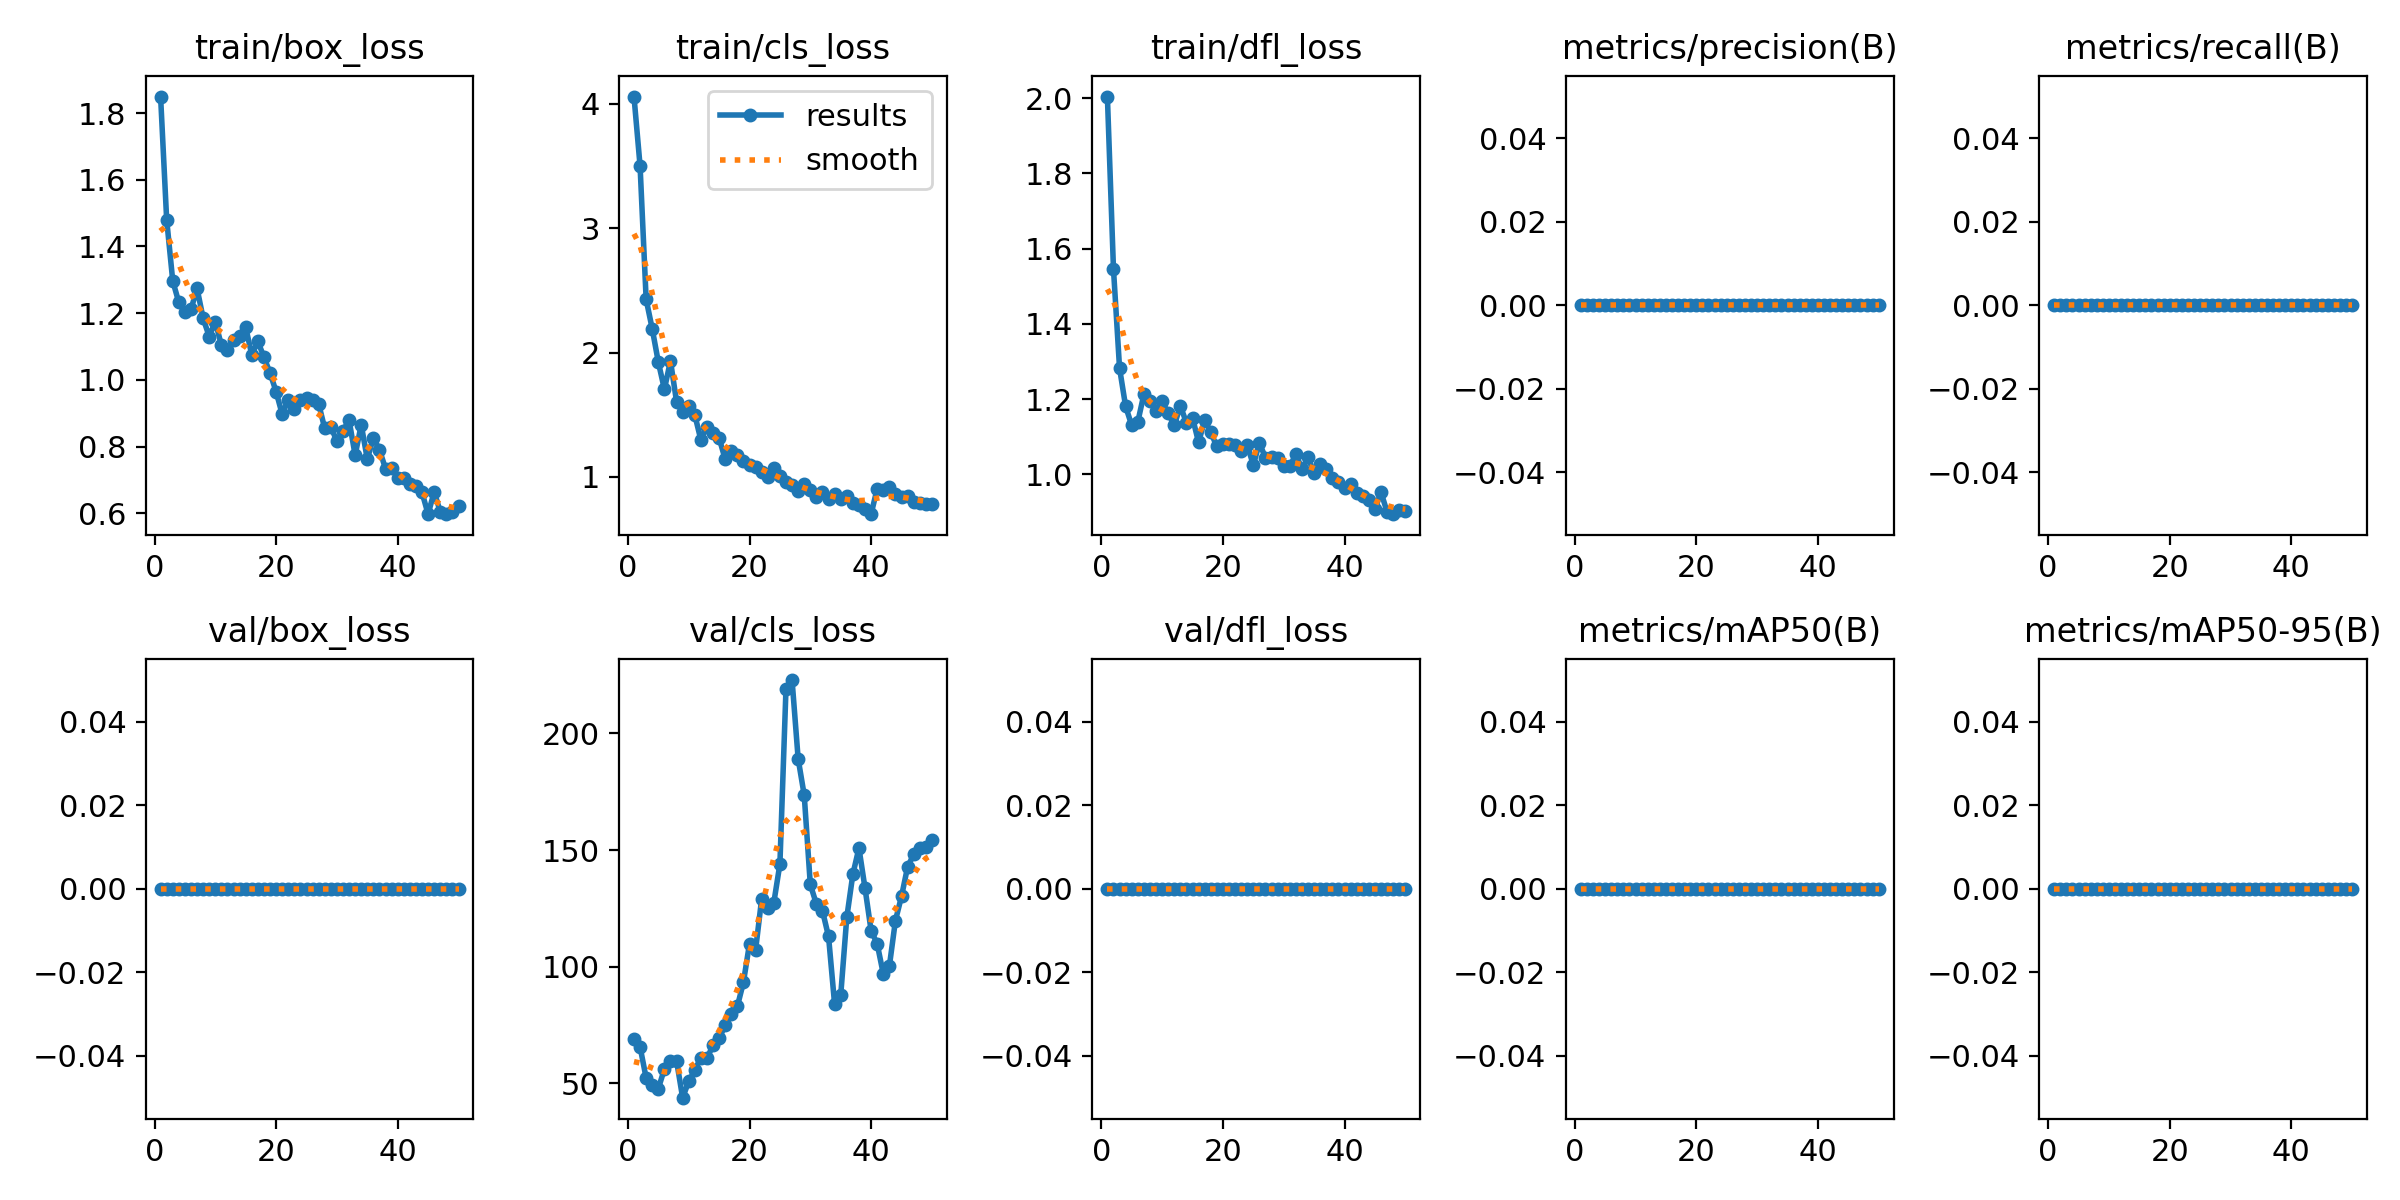

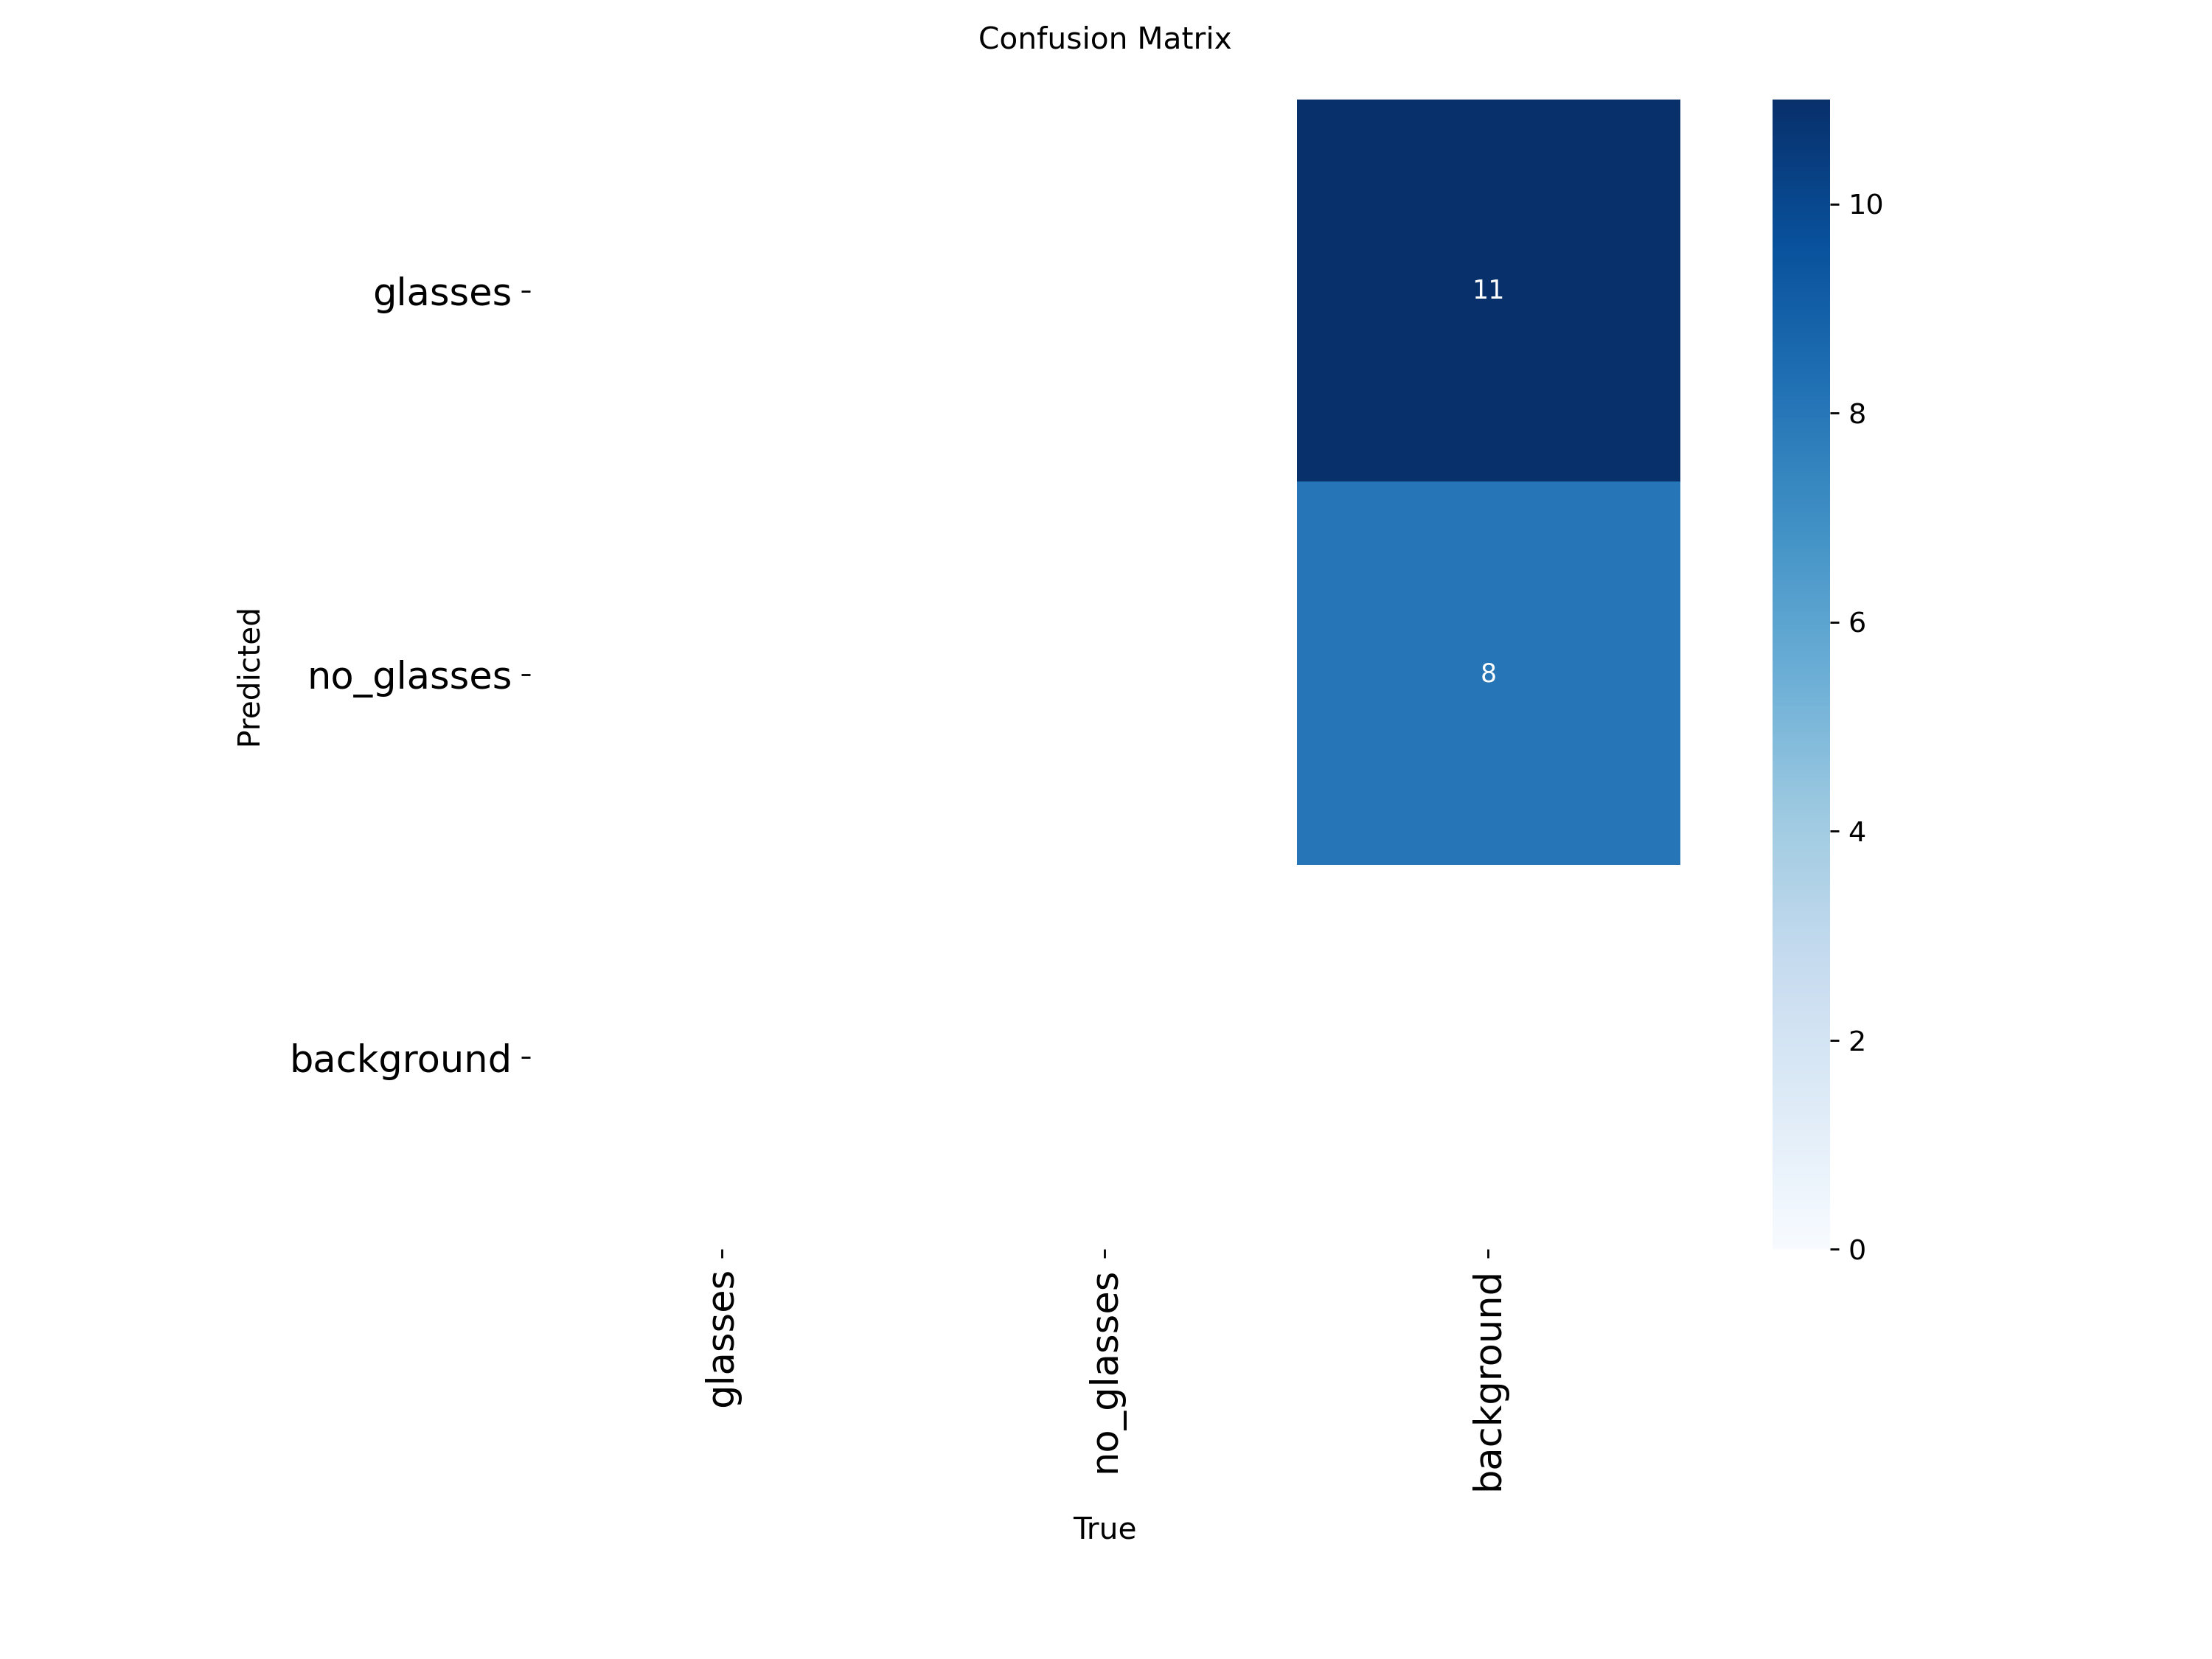

In [20]:
import matplotlib.pyplot as plt
import os

# Eğitim sonuçlarının kaydedildiği varsayılan yol
results_dir = '/content/drive/MyDrive/yüzde gözlük teşhisi/YOLOv8_Training_Results/glasses_detection_run'


best_model_path = os.path.join(results_dir, 'weights', 'best.pt')
best_model = YOLO(best_model_path)

# Doğrulama (Validation) kümesinde değerlendirme
metrics = best_model.val(data=yaml_file_path)

print("\n### Doğrulama Metrikleri ###")
print(f"mAP50: {metrics.box.map50}")
print(f"mAP50-95: {metrics.box.map}")


print("\n### Grafik Sonuçları ###")

try:
    from IPython.display import Image, display
    # Eğitimin ana sonuç grafiği
    display(Image(filename=os.path.join(results_dir, 'results.png')))
    # Karışıklık Matrisi (Confusion Matrix)
    display(Image(filename=os.path.join(results_dir, 'confusion_matrix.png')))
except FileNotFoundError:
    print(f"Uyarı: Grafik dosyaları bulunamadı. Lütfen '{results_dir}' klasörünü kontrol edin.")

sürekli verilen eğitimleri karışmasını önlemek amacı ile, son dosyayı bulmak için yazılan kod buloğu.

In [22]:
import os

# Sonuç klasörlerinin üst dizini
parent_results_dir = '/content/drive/MyDrive/yüzde gözlük teşhisi/YOLOv8_Training_Results'

print(f"'{parent_results_dir}' içindeki klasörler aranıyor...")

if os.path.exists(parent_results_dir):
    # Dizin içindeki tüm öğeleri listele
    all_items = os.listdir(parent_results_dir)
    # Sadece klasörleri (run klasörlerini) filtrele
    run_folders = [item for item in all_items if os.path.isdir(os.path.join(parent_results_dir, item))]

    if run_folders:
        print("\nBulunan eğitim çalışması klasörleri:")
        for i, folder in enumerate(run_folders):
            print(f"[{i+1}] - **{folder}**")

        latest_run = sorted(run_folders)[-1]
        print(f"\n✅ Lütfen yukarıdaki listeden en son çalıştırdığınız adı (Büyük ihtimalle: **{latest_run}**) kopyalayın.")

    else:
        print("❌ Uyarı: 'YOLOv8_Training_Results' içinde herhangi bir run klasörü bulunamadı.")
else:
    print(f"❌ HATA: '{parent_results_dir}' dizini bulunamadı. Lütfen Drive bağlantısını kontrol edin.")

'/content/drive/MyDrive/yüzde gözlük teşhisi/YOLOv8_Training_Results' içindeki klasörler aranıyor...

Bulunan eğitim çalışması klasörleri:
[1] - **glasses_detection_run**
[2] - **glasses_detection_run2**
[3] - **glasses_detection_run3**
[4] - **glasses_detection_run4**

✅ Lütfen yukarıdaki listeden en son çalıştırdığınız adı (Büyük ihtimalle: **glasses_detection_run4**) kopyalayın.


# 4. cv2 Kütüphanesi ile Kutu Çizimi


image 1/1 /content/drive/MyDrive/yüzde gözlük teşhisi/dataset/images/test/23.jpg: 448x640 1 no_glasses, 7.6ms
Speed: 2.2ms preprocess, 7.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


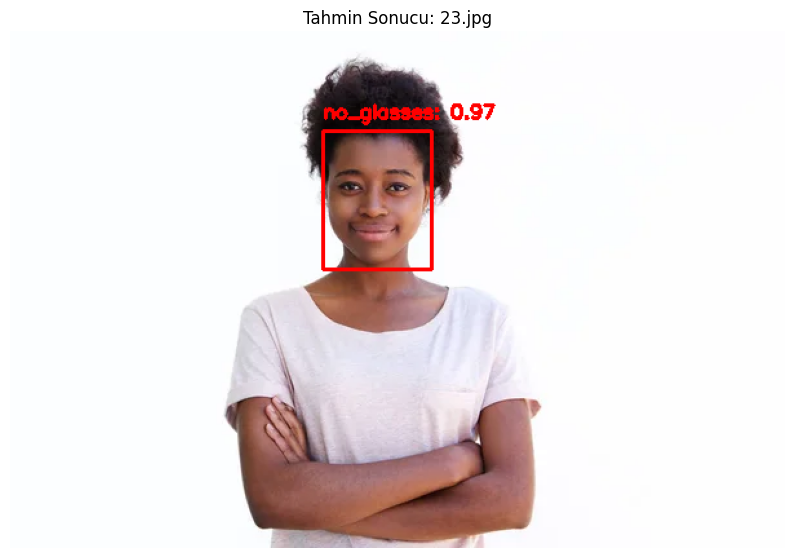

In [24]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import random

# Eğitilmiş en iyi modeli yükleme
best_model_path = '/content/drive/MyDrive/yüzde gözlük teşhisi/YOLOv8_Training_Results/glasses_detection_run/weights/best.pt'
model = YOLO(best_model_path)

# Sınıf isimleri
CLASS_NAMES = ['glasses', 'no_glasses']

# Test resimlerinin olduğu klasör
TEST_IMAGES_DIR = '/content/drive/MyDrive/yüzde gözlük teşhisi/dataset/images/test'
if not os.path.exists(TEST_IMAGES_DIR):
    print("Test resim klasörü bulunamadı.")
else:
    # Rastgele bir test resmini seçme
    test_images = [f for f in os.listdir(TEST_IMAGES_DIR) if f.endswith(('.jpg', '.jpeg', '.png'))]
    if not test_images:
        print("Test resim klasöründe resim bulunamadı.")
    else:
        # Rastgele bir resim seçin
        img_filename = random.choice(test_images)
        img_path = os.path.join(TEST_IMAGES_DIR, img_filename)

        # Tahmin yapma
        results = model.predict(source=img_path, conf=0.25) # conf eşiğini ayarlayın

        # Orijinal resmi yükleme
        img = cv2.imread(img_path)

        # Tespit edilen her nesne için kutu çizme
        for r in results:
            boxes = r.boxes

            for box in boxes:
                # Koordinatları al
                x1, y1, x2, y2 = [int(i) for i in box.xyxy[0].tolist()]

                # Sınıf ID'si ve güven skoru
                cls_id = int(box.cls[0].item())
                conf = box.conf[0].item()
                label = f'{CLASS_NAMES[cls_id]}: {conf:.2f}'

                color = (0, 255, 0) if CLASS_NAMES[cls_id] == 'glasses' else (0, 0, 255) # BGR

                # Bounding box çizme
                cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)

                # Etiket koyma
                cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        # Resmi RGB'ye çevirip gösterme.
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 10))
        plt.imshow(img_rgb)
        plt.title(f"Tahmin Sonucu: {img_filename}")
        plt.axis('off')
        plt.show()

Webcam ile görüntülü bir şekilde projemizi test ediyoruz.

HATIRLATMA:

Google Colab'in standart ortamında cv2.VideoCapture(0) kodu direkt olarak tarayıcınızdaki web kamerasına erişemez. Eğer bu kodu Colab'de çalıştırmak istiyorsanız, genellikle ya google.colab.patches.cv2_imshow gibi Colab'e özgü çözümler kullanmanız ya da kodu web kamerası erişimine sahip bir terminalde (örneğin, yerel bilgisayarınızdaki bir Jupyter Notebook veya Python ortamı) çalıştırmanız gerekir.

In [ ]:
#webcam ile nesne tespit algoritmasını çalıştırma.
import cv2
from ultralytics import YOLO
import os


MODEL_PATH = '/content/drive/MyDrive/yüzde gözlük teşhisi/YOLOv8_Training_Results/glasses_detection_final_run/weights/best.pt'

CLASS_NAMES = ['glasses', 'no_glasses']

# 3. Webcam ID'si (Genellikle 0, eğer harici kamera varsa 1, 2, vb. olabilir)
WEBCAM_ID = 0

# MODELİ YÜKLEME
try:
    model = YOLO(MODEL_PATH)
except Exception as e:
    print(f"Hata: Model yüklenemedi. Yolu kontrol edin: {e}")
    exit()

# VİDEO YAKALAMA BAŞLATMA
cap = cv2.VideoCapture(WEBCAM_ID)

if not cap.isOpened():
    print(f"Hata: Webcam (ID: {WEBCAM_ID}) açılamadı.")
    exit()

print("\n--- Canlı Tespit Başladı. Çıkış için 'q' tuşuna basın. ---\n")

while True:
    ret, frame = cap.read()

    if not ret:
        print("Frame alınamadı, çıkılıyor...")
        break

    # YOLOv8 ile Tahmin
    # conf=0.5: Güven eşiği (%50'nin altındaki tahminleri yok sayar)
    results = model(frame, conf=0.5, verbose=False)

    # Tespit edilen sonuçları işleme
    for r in results:
        boxes = r.boxes

        for box in boxes:
            # Koordinatları al
            # xyxy: [x1, y1, x2, y2] piksel koordinatları
            x1, y1, x2, y2 = [int(i) for i in box.xyxy[0].tolist()]

            # Sınıf ID'si ve güven skoru
            cls_id = int(box.cls[0].item())
            conf = box.conf[0].item()
            label = f'{CLASS_NAMES[cls_id]}: {conf:.2f}'

            # Renk seçimi
            color = (0, 255, 0) if CLASS_NAMES[cls_id] == 'glasses' else (0, 0, 255) # BGR

            # Bounding box çizme
            cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)

            # Etiket koyma
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    # Frame'i Gösterme
    # Yerel çalıştırmada bu pencereyi görürsünüz
    cv2.imshow('YOLOv8 Live Detection', frame)

    # 'q' tuşuna basıldığında döngüyü kır
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Temizleme
cap.release()
cv2.destroyAllWindows()
print("\nCanlı tespit sonlandırıldı.")